In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataTrain=pd.read_csv(r'C:\Users\Skmal\OneDrive\Documents\Clean_Dataset.csv')

dataTrain.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
dataTrain.shape

(300153, 10)

In [4]:
dataTrain.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [5]:
dataTrain['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [6]:
dataTrain['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
dataTrain.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
dataTrain.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

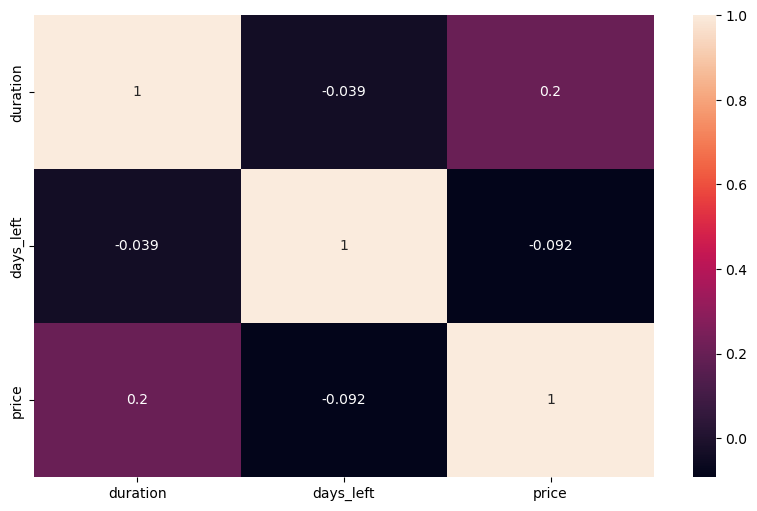

In [9]:
plt.figure(figsize=(10,6))
numerical_features = dataTrain.select_dtypes(include=['number']).columns
corr = dataTrain[numerical_features].corr()
sns.heatmap(corr,annot=True)
plt.show()

<Axes: xlabel='duration', ylabel='price'>

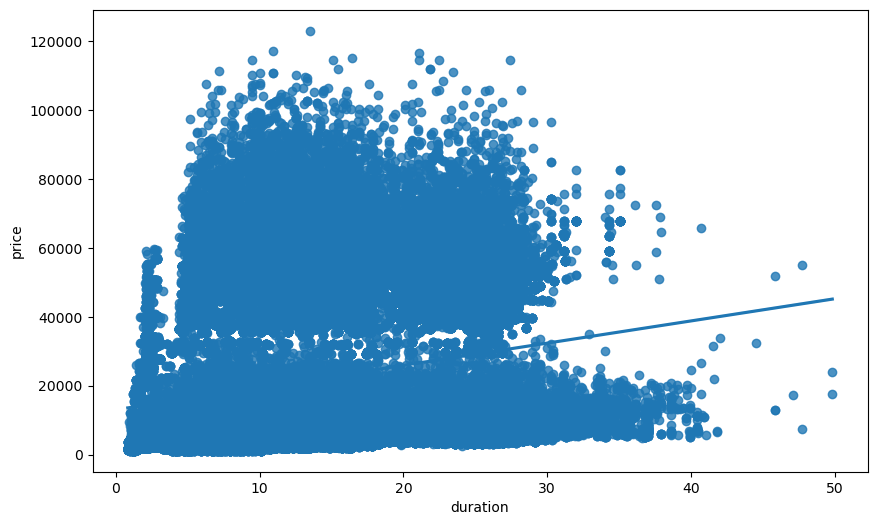

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration", y="price", data=dataTrain)

In [11]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['duration'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2042223678454301  with a P-value of P = 0.0


<Axes: xlabel='days_left', ylabel='price'>

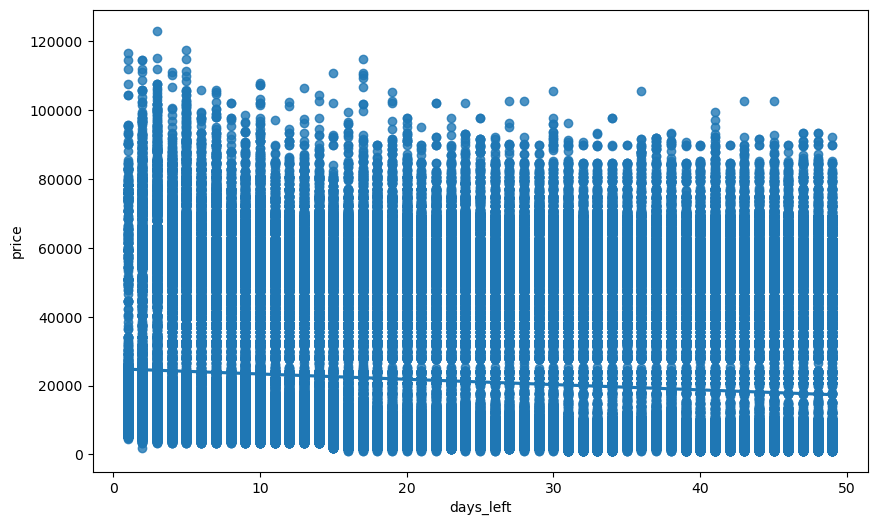

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x="days_left", y="price", data=dataTrain)

In [13]:
pearson_coef, p_value = stats.pearsonr(dataTrain['days_left'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.09194853217143585  with a P-value of P = 0.0


<Axes: xlabel='airline', ylabel='price'>

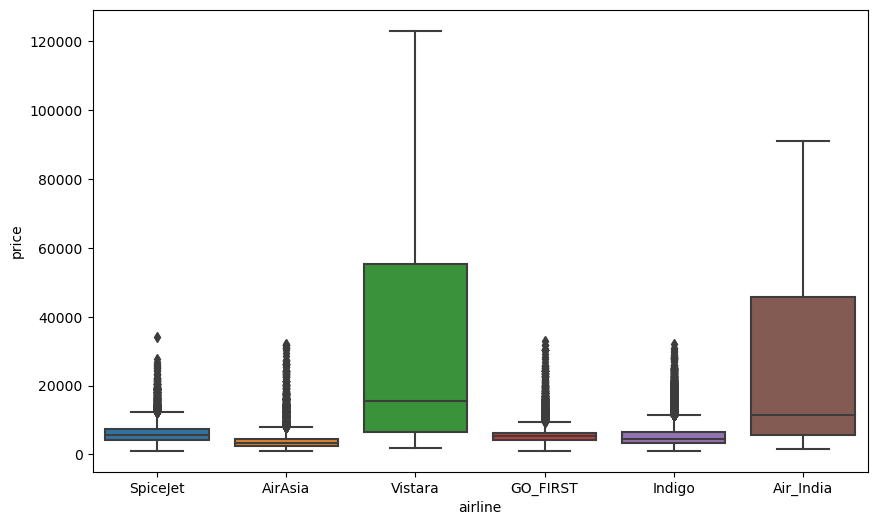

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="price", data=dataTrain)

<Axes: xlabel='source_city', ylabel='price'>

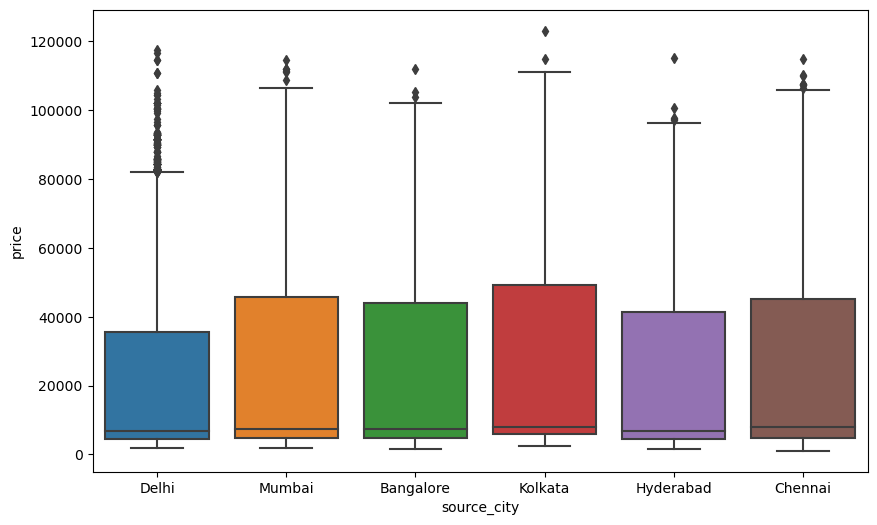

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x="source_city", y="price", data=dataTrain)

<Axes: xlabel='departure_time', ylabel='price'>

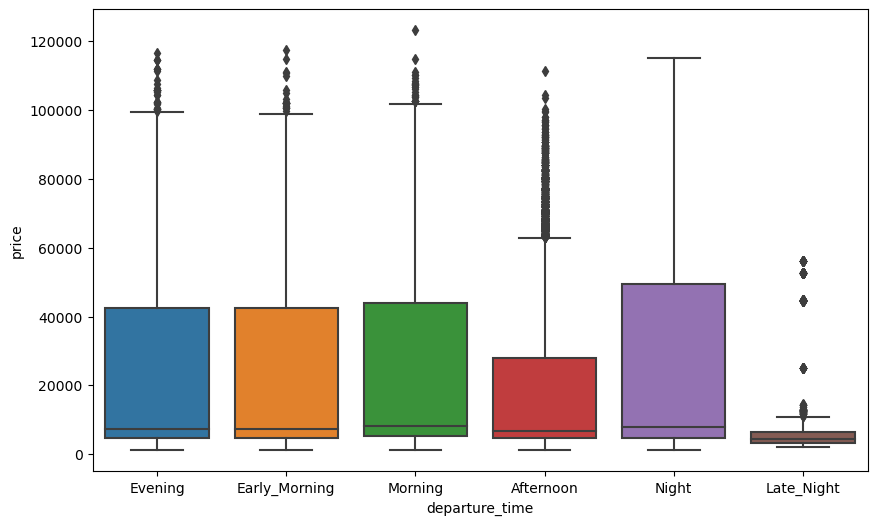

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x="departure_time", y="price", data=dataTrain)

<Axes: xlabel='stops', ylabel='price'>

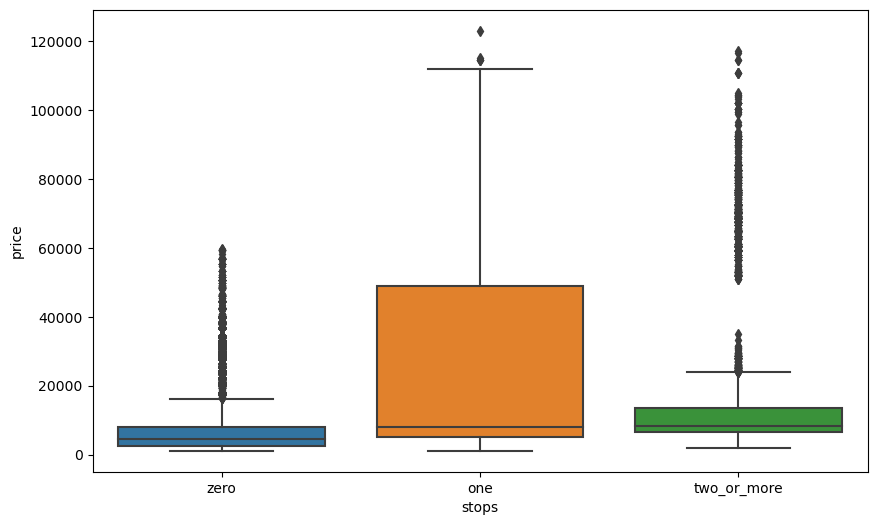

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x="stops", y="price", data=dataTrain)

<Axes: xlabel='arrival_time', ylabel='price'>

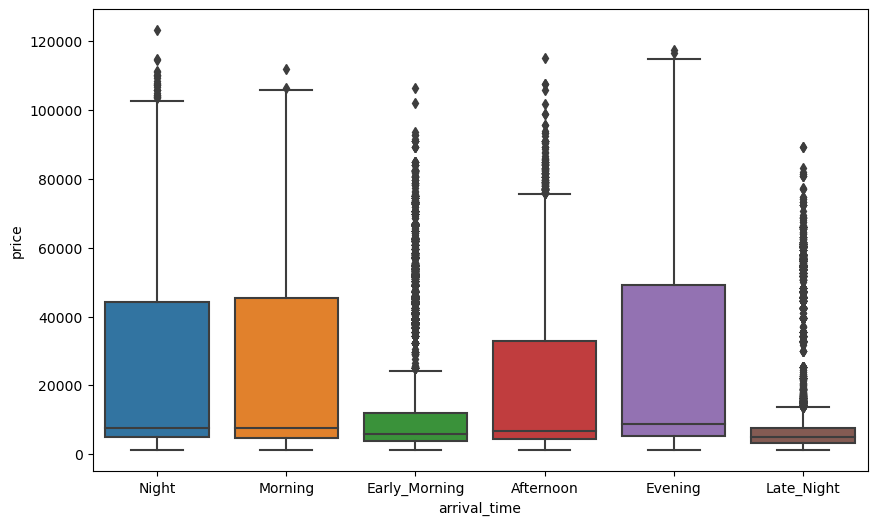

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="arrival_time", y="price", data=dataTrain)

<Axes: xlabel='destination_city', ylabel='price'>

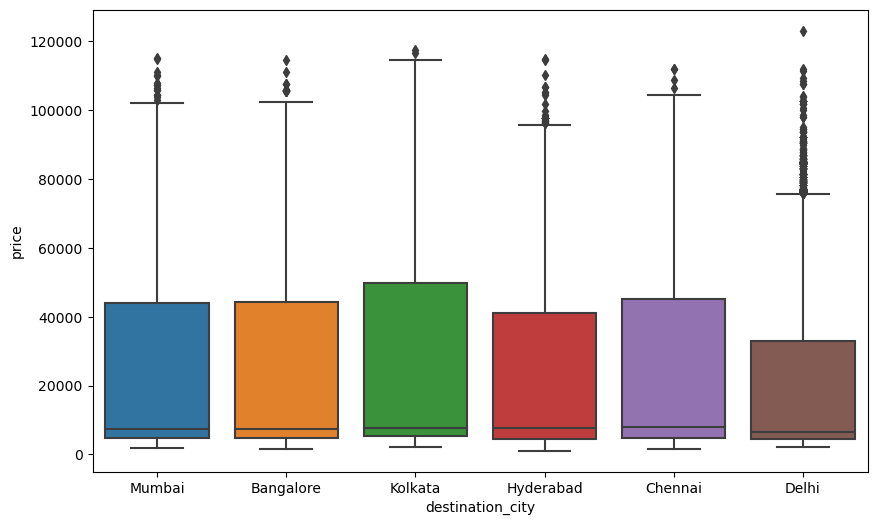

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="destination_city", y="price", data=dataTrain)

<Axes: xlabel='class', ylabel='price'>

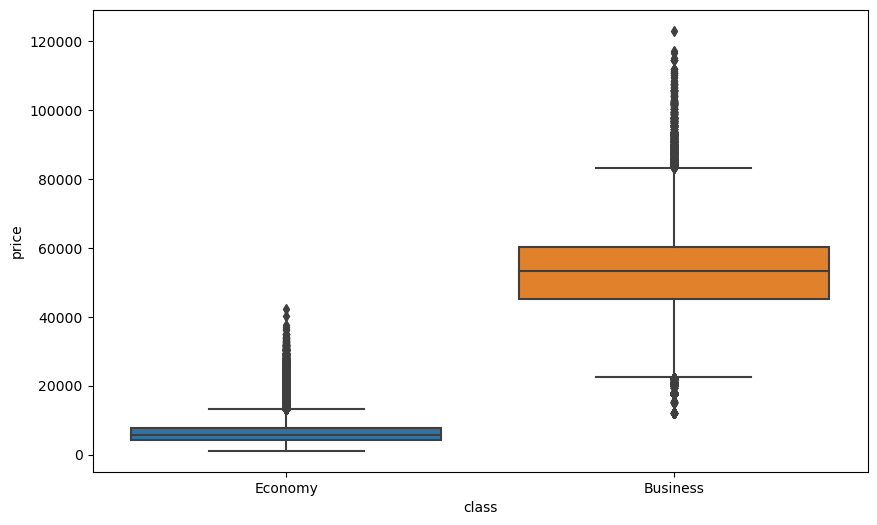

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="class", y="price", data=dataTrain)

In [29]:
dataTrain.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [30]:
dataTrain.shape

(300153, 10)

In [32]:
dataTrain.describe(include=['object'])

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153
unique,6,6,6,3,6,6,2
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,61343,71146,250863,91538,59097,206666


In [33]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain['airline'] = labelencoder.fit_transform(dataTrain['airline'])
dataTrain['source_city'] = labelencoder.fit_transform(dataTrain['source_city'])
dataTrain['departure_time'] = labelencoder.fit_transform(dataTrain['departure_time'])
dataTrain['stops'] = labelencoder.fit_transform(dataTrain['stops'])
dataTrain['arrival_time'] = labelencoder.fit_transform(dataTrain['arrival_time'])
dataTrain['destination_city'] = labelencoder.fit_transform(dataTrain['destination_city'])
dataTrain['class'] = labelencoder.fit_transform(dataTrain['class'])  # Consistent format



In [34]:
dataTrain.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
5,5,2,4,2,0,5,1,2.33,1,5955
6,5,2,4,2,4,5,1,2.08,1,6060
7,5,2,0,2,2,5,1,2.17,1,6060
8,2,2,1,2,4,5,1,2.17,1,5954
9,2,2,0,2,2,5,1,2.25,1,5954


In [35]:
x_train_actual = dataTrain.iloc[:, :-1]
y_train_actual = dataTrain.iloc[:, -1]  

In [36]:
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [37]:
dataTrain

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.397531,-1.843875,-0.658068
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875,-0.658068
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.397531,-1.843875,-0.657936
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.386407,-1.843875,-0.657980
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.375284,-1.843875,-0.657980
...,...,...,...,...,...,...,...,...,...,...
300148,1.033746,-0.900576,0.902176,-0.426792,-0.616701,0.235992,-1.486822,-0.297695,1.695692,2.131285
300149,1.033746,-0.900576,-1.377971,-0.426792,1.105790,0.235992,-1.486822,-0.250421,1.695692,2.476694
300150,1.033746,-0.900576,-0.807934,-0.426792,1.105790,0.235992,-1.486822,0.223718,1.695692,2.564545
300151,1.033746,-0.900576,-0.807934,-0.426792,-0.616701,0.235992,-1.486822,-0.308819,1.695692,2.674071


In [38]:
dataTrain = dataTrain.clip(-1, 1)

In [39]:
dataTrain

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.48827,-0.329721,-0.237897,1.000000,1.000000,1.000000,0.672576,-1.000000,-1.0,-0.658068
1,0.48827,-0.329721,-0.807934,1.000000,0.531627,1.000000,0.672576,-1.000000,-1.0,-0.658068
2,-1.00000,-0.329721,-0.807934,1.000000,-1.000000,1.000000,0.672576,-1.000000,-1.0,-0.657936
3,1.00000,-0.329721,0.902176,1.000000,-1.000000,1.000000,0.672576,-1.000000,-1.0,-0.657980
4,1.00000,-0.329721,0.902176,1.000000,0.531627,1.000000,0.672576,-1.000000,-1.0,-0.657980
...,...,...,...,...,...,...,...,...,...,...
300148,1.00000,-0.900576,0.902176,-0.426792,-0.616701,0.235992,-1.000000,-0.297695,1.0,1.000000
300149,1.00000,-0.900576,-1.000000,-0.426792,1.000000,0.235992,-1.000000,-0.250421,1.0,1.000000
300150,1.00000,-0.900576,-0.807934,-0.426792,1.000000,0.235992,-1.000000,0.223718,1.0,1.000000
300151,1.00000,-0.900576,-0.807934,-0.426792,-0.616701,0.235992,-1.000000,-0.308819,1.0,1.000000


In [41]:
x_train=dataTrain.iloc[:,:-1]
y_train=dataTrain.iloc[:,-1]

In [42]:
x_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.48827,-0.329721,-0.237897,1.0,1.000000,1.0,0.672576,-1.0,-1.0
1,0.48827,-0.329721,-0.807934,1.0,0.531627,1.0,0.672576,-1.0,-1.0
2,-1.00000,-0.329721,-0.807934,1.0,-1.000000,1.0,0.672576,-1.0,-1.0
3,1.00000,-0.329721,0.902176,1.0,-1.000000,1.0,0.672576,-1.0,-1.0
4,1.00000,-0.329721,0.902176,1.0,0.531627,1.0,0.672576,-1.0,-1.0


In [43]:
y_train.head()

0   -0.658068
1   -0.658068
2   -0.657936
3   -0.657980
4   -0.657980
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

# Define features and target
x = dataTrain.drop(columns=['price'])
y = dataTrain['price']

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [63]:
from sklearn.linear_model import LinearRegression

# Train the model
model_MLR = LinearRegression()
model_MLR.fit(x_train, y_train)

# Align columns in x_test with x_train before prediction
x_test = x_test[x_train.columns]

# Predict
y_pred_MLR = model_MLR.predict(x_test)


In [64]:
mse1 = mean_squared_error(y_test, y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.025083984865436396


In [65]:
mae1= mean_absolute_error(y_test, y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.10825205268903598


In [66]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [67]:
y_pred_RF = model_rf.predict(x_test)

In [69]:
mse2 = mean_squared_error(y_test, y_pred_RF)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.004974853521274817


In [70]:
mae2= mean_absolute_error(y_test, y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.02881405767246578


In [73]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
         ]

In [74]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.108252
1,Random Forest,0.028814


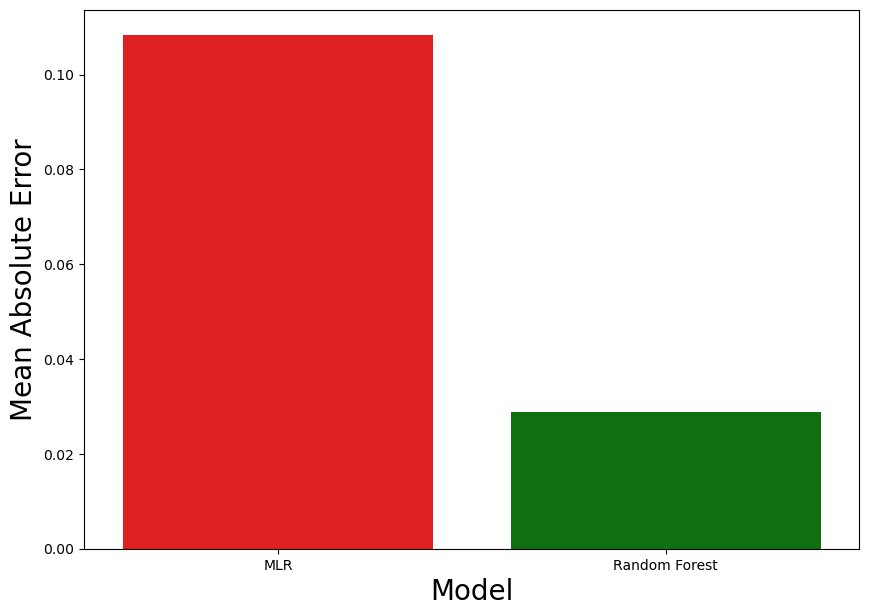

In [75]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))

model_colors = ['red', 'green']

sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe, palette=model_colors)

axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

In [71]:
#calculating the training accuracy score
print(model_rf.score(x_train, y_train))
print(model_MLR.score(x_train, y_train))

0.9955063725089498
0.9541595329993315


In [72]:
from sklearn.metrics import r2_score
Rsquared = r2_score(y_test,y_pred_RF)
print('R2 score for RF is ',Rsquared)
Rsquared = r2_score(y_test,y_pred_MLR)
print('R2 score for MLR is ',Rsquared)




R2 score for RF is  0.9908904965806408
R2 score for MLR is  0.9540684675587605


In [81]:
import pickle
import pandas as pd

# Step 1: Save the trained model to a file
filename = 'flight_prediction_model.pickle'  
with open(filename, 'wb') as f:
    pickle.dump(model_rf, f)  

# Step 2: Load the model from the file
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)  # Load the model

# Step 3: Predict scaled prices using x_test
y_pred_scaled = loaded_model.predict(x_test) 

# Step 4: Use statistics from the original dataset (training data) to unscale predictions
# Calculate mean and std of 'price' column during training
original_price_mean = pd.read_csv(r"C:\Users\Skmal\OneDrive\Documents\Clean_Dataset.csv")['price'].mean()
original_price_std = pd.read_csv(r"C:\Users\Skmal\OneDrive\Documents\Clean_Dataset.csv")['price'].std()

# Step 5: Unscale predictions to get actual prices
predicted_price = (y_pred_scaled * original_price_std) + original_price_mean

# Step 6: Unscale the test prices
y_test_unscaled = (y_test * original_price_std) + original_price_mean

# Step 7: Create a DataFrame to compare unscaled actual and predicted prices
results_df = pd.DataFrame({
    'Actual Price': y_test_unscaled,   # Unscaled actual prices
    'Predicted Price': predicted_price  # Unscaled predicted prices
})

# Step 8: Display the first few rows of the results
print("Comparison of Actual and Predicted Prices:")
display(results_df.head(10))  

# Step 9: Save the results to a CSV file
results_df.to_csv('results_unscaled.csv', index=False)



Comparison of Actual and Predicted Prices:


,Actual Price,Predicted Price
44712,10720.983061,15700.139252
233644,43587.427889,43587.427889
121467,6908.976711,6494.383496
185846,2270.968985,2591.529128
163599,4362.972470,5037.452926
192119,4356.972460,4588.262845
284224,43587.427889,43587.427889
287622,43587.427889,43587.427889
134801,4913.973387,4573.141024
17827,4019.971898,3977.771828


Results saved to 'results_unscaled.csv'.
